In [2]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


In [17]:
total_train = pd.read_csv('data/train/train_full.csv', sep='\t', encoding = 'utf-8')
total_train['x'] = total_train.apply(lambda row: row['lemma'] + str(row['formtag']), axis=1)
train_filtered = total_train[total_train.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]

In [6]:
# для итерации, на которой достигнута нужная аккьюраси
# смотрим train - train_rest. это те семплы,которые модель отобрала для обучения

In [7]:
train_rest = pd.read_csv('training_loop/test/lev/train_rest_after_6_step.csv', sep='\t', encoding = 'utf-8')
rest_words = train_rest['x']
selected = train_filtered[~train_filtered.x.isin(rest_words)]
len(selected)

70000

In [8]:
#слова, которые видела n_ная модель
plot_selected = selected[['classtag']].copy()
plot_selected['total_count_selected'] = [1]*len(plot_selected)
plot_selected = plot_selected.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
#plot_selected = plot_selected.sort_values(by=['total_count'], ascending=False)


In [19]:
#все слова по классам
plot_total = train_filtered[['classtag']].copy()
plot_total['total_count'] = [1]*len(train_filtered)
plot_total = plot_total.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
plot_total = plot_total.sort_values(by=['total_count'], ascending=False)

In [10]:
#plot_total = plot_total.reset_index(level=['classtag'])

In [11]:
df = pd.merge(plot_total, plot_selected, left_index=True, right_index=True)

In [12]:
df[:2]

,total_count,total_count_selected
classtag,,
м1а,68832,10956
ж8а,33732,9870


### сколько слов из каждого класса выбрала модель

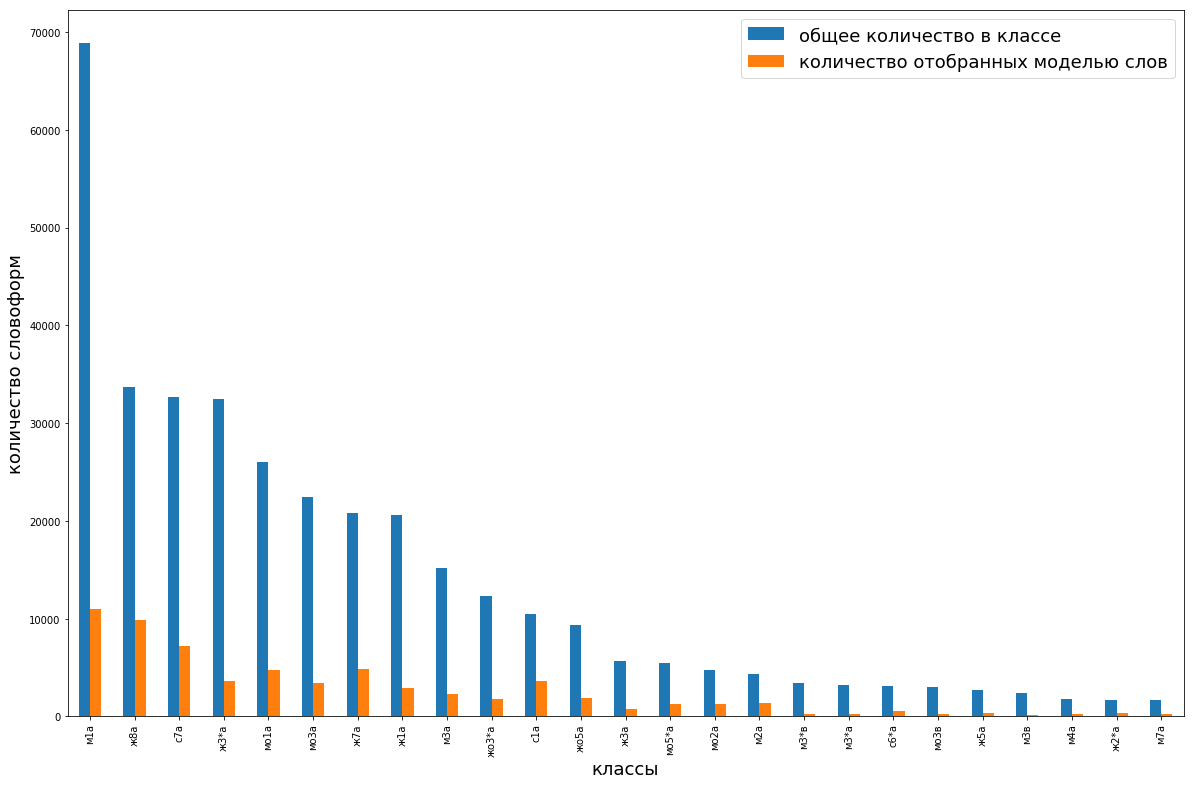

In [13]:
ax = df[[ 'total_count', 'total_count_selected']][:25].plot.bar(stacked = False, figsize = (20,13))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('количество словоформ', fontsize=18)
#ax.set_title('Распределение выбранных моделью слов по классам', fontsize=18)
ax.legend(loc=1, ncol=1, fontsize=18, labels = ['общее количество в классе', 'количество отобранных моделью слов'])

#ax.set_ylim([0,30000])
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()+2000),  rotation =45, fontsize=12, clip_on=True)

In [20]:
df[:50]

,total_count,total_count_selected,ratio
classtag,,,
м1а,68832,10956,0.159170
ж8а,33732,9870,0.292600
с7а,32628,7184,0.220179
ж3*а,32460,3601,0.110937
мо1а,26028,4699,0.180536
мо3а,22428,3374,0.150437
ж7а,20844,4822,0.231338
ж1а,20580,2922,0.141983
м3а,15168,2318,0.152822


In [14]:
df['ratio'] = df['total_count_selected']/df['total_count']


In [15]:
from numpy import mean
mean(df['ratio'][:50])

0.1657472857750023

([<matplotlib.axis.YTick at 0x2111343d160>,
 <a list of 10 Text yticklabel objects>)

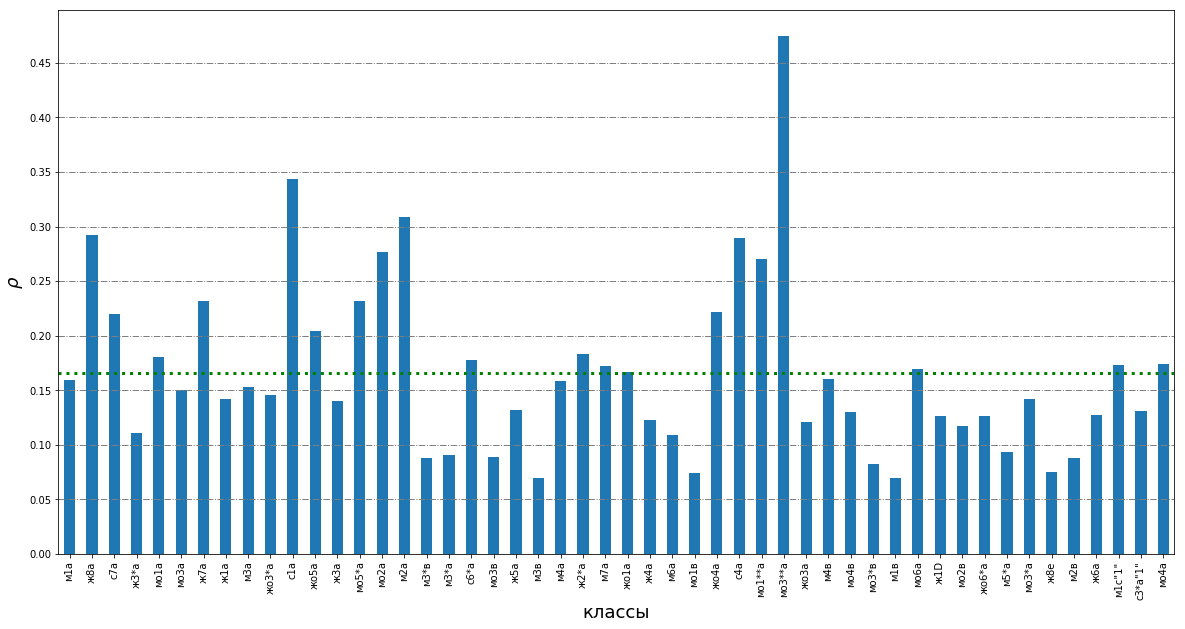

In [16]:
ax = df['ratio'][:50].plot.bar(stacked = False, figsize = (20,10))
ax.yaxis.grid(color='tab:grey', linestyle='-.', linewidth=1)
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel(r'$\rho$', fontsize=18)
mean = df['ratio'][:50].mean()
ax.axhline(y= mean,linewidth=3, color='g', linestyle=':')
plt.yticks(np.arange(0.0, 0.5, 0.05))

#ax.set_title("Отношение отобранных моделью слов ко всему классу", fontsize=18)

In [17]:
df_ratio = df.copy()
df_ratio[:50].sort_values(by = 'ratio', ascending = False)[:10].index

Index(['мо3**а', 'с1а', 'м2а', 'ж8а', 'с4а', 'мо2а', 'мо1**а', 'мо5*а', 'ж7а',
       'жо4а'],
      dtype='object', name='classtag')

In [18]:
errors_lev = pd.read_csv('training_loop/eval/lev/eval_model_6.csv', sep='\t', encoding = 'utf-8')

In [54]:
train_filtered[train_filtered['lemma'] == 'небылица'][:2]

,lemma,gender,formtag,classtag,form,x
44561,небылица,ж,1I,ж5а,небылицей,небылица1I
120761,небылица,ж,1A,ж5а,небылицу,небылица1A


In [53]:
errors_lev[(errors_lev['classtag'] == 'жо4а') & (errors_lev['seq2seq_eval'] == False)][:100]

,lemma,gender,formtag,classtag,form,seq2seq_predictions,seq2seq_eval
6821,библиотекарша,жо,2I,жо4а,библиотекаршами,библиотекатами,False
7432,генеральша,жо,2A,жо4а,генеральш,генеральши,False
9466,швейцарша,жо,1D,жо4а,швейцарше,швешмарше,False
11360,контролёрша,жо,2A,жо4а,контролёрш,контроплёры,False
13676,миллиардерша,жо,1I,жо4а,миллиардершей,миллиарделите,False
13845,библиотекарша,жо,1L,жо4а,библиотекарше,библиотекателе,False
14641,управительша,жо,2G,жо4а,управительш,управитшлен,False
14910,миллиардерша,жо,1L,жо4а,миллиардерше,миллиарделите,False
17755,организаторша,жо,2N,жо4а,организаторши,организаторы,False
18027,костюмерша,жо,2A,жо4а,костюмерш,костюмерши,False


### для каждого класса: зависимость аккуратности от наполненности

In [12]:
def accuracy(data):
    a,t,f = 0,0,0
    eval_ = data['seq2seq_eval']
    values =  eval_.value_counts()
    try:
        t = values[True]
    except:
        t = 0
    try:    
        f = values[False]
    except:
        f = 0
    try:
        a = t/(len(eval_))
    except:
        a = 0
    a = round(a,4)
    #print('Total count:', len(eval_))
    #print('False:', f)
    #print('True:', t)
    #print('accuracy:',a)
    return a

In [ ]:
# для каждой итерации смотрим train_rest, вычитаем его из train_filtered.
# получаем то, что видела сеть к этой итерации, groupby_selected соединяем с groupby_total,
# считаем ratio - отношение известных слов ко словам всем в классе
# вычитываем файл  eval_model_n.csv
# для каждого класса считаем accuracy по нему

In [13]:
# создаем dataframe для визуализации 40*518. строки - итерации, столбцы - класс_ratio, класс_acc 

total_test = pd.read_csv('data/test/test_full.csv', sep='\t', encoding = 'utf-8')
test_filtered = total_test[total_test.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]
test_classes = test_filtered[['classtag']].copy()
test_classes['total_count'] = [1]*len(test_classes)
test_classes = test_classes.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
test_classes = test_classes.sort_values(by=['total_count'], ascending=False) #124 класса

In [14]:
classes = test_classes.index #124
columns_ = [a + b for a in classes for b in ['_ratio','_acc']] #248
ratio_acc = pd.DataFrame(np.zeros((38, 248)),index = range(1,39), columns=columns_)

In [20]:
%time
for i in range(1,39):
    train_rest_file = 'training_loop/test/lev/train_rest_after_{}_step.csv'.format(i-1)
    acc_file = 'training_loop/eval/lev/eval_model_{}.csv'.format(i)
    seen_words_file  = 'training_loop/test/lev/seen_words_model_{}.csv'.format(i)
    acc_data = pd.read_csv(acc_file, sep='\t', encoding = 'utf-8')
    macro_acc = accuracy(acc_data)
    #print('state after {} iteration...'.format(i))
    if i == 1:
        seen_words = train_filtered[:10000]
    else:
        train_rest = pd.read_csv(train_rest_file, sep='\t', encoding = 'utf-8')
        rest_words = train_rest['x']
        seen_words = train_filtered[~train_filtered.x.isin(rest_words)]
    seen_words.to_csv(seen_words_file, sep='\t', encoding = 'utf-8', index = False)
    #print('model has seen {} words'.format(len(seen_words)))
    seen_classes = seen_words[['classtag']].copy()
    seen_classes['total_count_selected'] = [1]*len(seen_classes)
    seen_classes = seen_classes.groupby(['classtag'], sort=True).aggregate(lambda x: int(sum(x)))
    #print('model has seen {} classes'.format(len(seen_classes)))
    df = pd.merge(plot_total, seen_classes, left_index=True, right_index=True)
    df['ratio'] = df['total_count_selected']/df['total_count']
    for class_ in seen_classes.index:
        if class_ in classes:
            #print('on class {} ...'.format(class_))
            class_ratio = round(df.loc[class_,'ratio'],4)
            class_acc = accuracy(acc_data.loc[acc_data['classtag'] == class_])
            ratio_acc.loc[i,class_ + '_ratio'] = class_ratio
            ratio_acc.loc[i,class_ + '_acc'] = class_acc
            #print('for class {} class_ratio == {}'.format(class_, class_ratio))
            #print('for class {} class_acc == {}'.format(class_, class_acc))
            #print('---')
ratio_acc.to_csv('data/viz/lev_ratio_accuracy_all_classes_all_epochs.csv', sep='\t', encoding = 'utf-8', index = False)

Wall time: 0 ns


In [ ]:
#загружаем ratio_acc

In [3]:
ratio_acc = pd.read_csv('data/viz/lev_ratio_accuracy_all_classes_all_epochs.csv', sep='\t', encoding = 'utf-8')

In [10]:
ratio_acc[:5]

,м1а_ratio,м1а_acc,ж8а_ratio,ж8а_acc,с7а_ratio,с7а_acc,ж3*а_ratio,ж3*а_acc,мо1а_ratio,мо1а_acc,...,жо8е_ratio,жо8е_acc,мо5а_ratio,мо5а_acc,жо6в_ratio,жо6в_acc,мо1**а@_ratio,мо1**а@_acc,с8**с_ratio,с8**с_acc
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


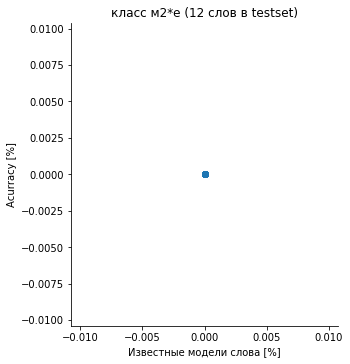

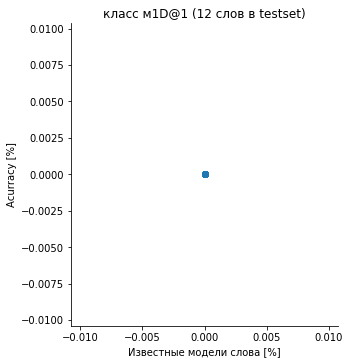

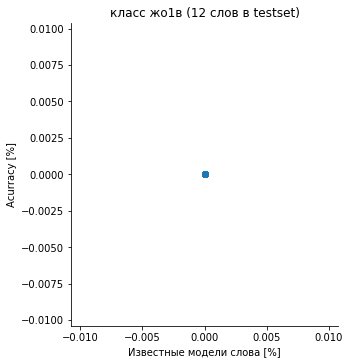

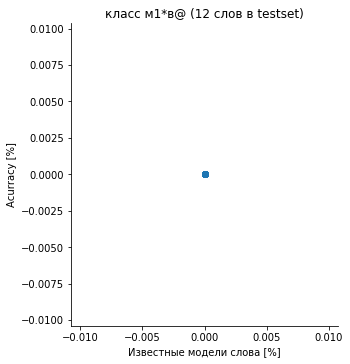

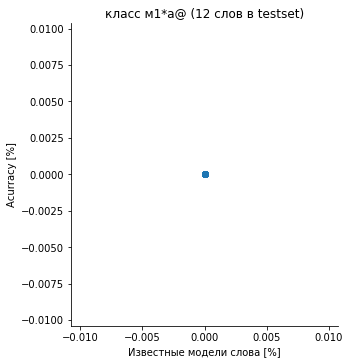

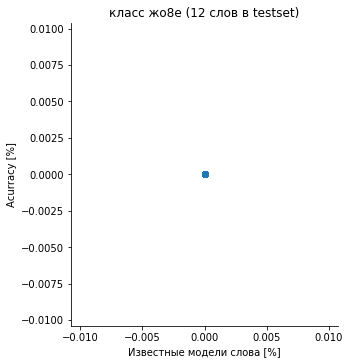

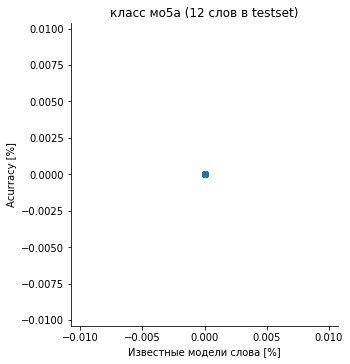

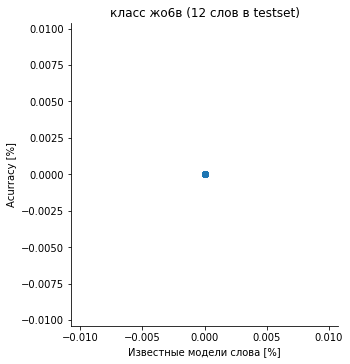

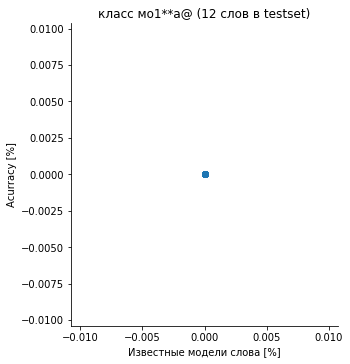

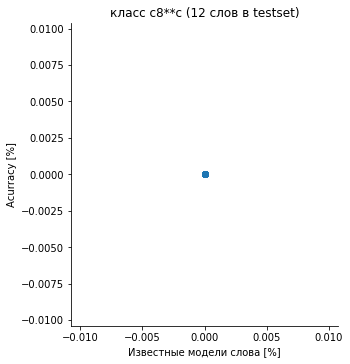

In [9]:
for class_ in classes[-10:]:
    x = class_ + '_ratio'
    y = class_ + '_acc'
    #sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 
    
    g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
    title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
    g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)


In [6]:
plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
for class_ in classes[:10]:
    x = class_ + '_ratio'
    y = class_ + '_acc'
    #sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 
    
    #g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
    title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
    #g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

    palette = plt.get_cmap('Set1')

    num += 1

    plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 5, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
    # geometric mean
    #plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

    # Add legend
    plt.legend(loc=4, ncol=1, fontsize=12)
    # Add titles
    #plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Известные модели слова [%]", fontsize=12)
    plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

 

NameError: name 'classes' is not defined

In [ ]:
classes[-10:]

In [ ]:
plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'мо1**а' #селянин - селяне
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Известные модели слова [%]", fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

In [ ]:
plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'жо1в' #гюрза гюрз
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Известные модели слова [%]", fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

In [ ]:

plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'м1D@1' #кол-колья прут-прутья лист-листья
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Известные модели слова [%]", fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

In [ ]:

plt.figure(figsize=(10,10))
num = 0
#for class_ in ['мо1**а', 'жо1в']:
class_ = 'мо3**а' # мышонок мышата
x = class_ + '_ratio'
y = class_ + '_acc'
#sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) 

#g = sns.lmplot(x=x, y=y, data=ratio_acc, fit_reg=False) #regplot  - на одной картинке
title = 'класс {} ({} слов в testset)'.format(class_,test_classes.loc[class_,'total_count'])
#g.set(xlabel = 'Известные модели слова [%]', ylabel = 'Acurracy [%]',title = title)

palette = plt.get_cmap('Set1')

num += 1

plt.plot(ratio_acc[x], ratio_acc[y], marker='.', markersize = 15, color=palette(num), linewidth=1, alpha=1.0, linestyle='dashed', label = title)
# geometric mean
#plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=12)
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Известные модели слова [%]", fontsize=12)
plt.ylabel( 'Acurracy [%]', fontsize=12)
#xticks = sorted(set(list(ratio_acc[x])))
#xticks = [round(y,2) for y in xticks]
plt.xticks(np.arange(0.0,1.0,0.1))
# подписи на оси y
#yticks = sorted(set(list(ratio_acc[y])))
#yticks = [round(y,2) for y in yticks]
plt.yticks(np.arange(0.0,1.0,0.1))

In [ ]:
#мо1**а селянин - селяне  1052
#жо1в гюрза -гюрз 29
#м1D@1 прут - прутья 28
seen_words =  pd.read_csv('training_loop/test/seen_words_model_35.csv', sep='\t', encoding = 'utf-8')
#seen_words.loc[seen_words['classtag'] == 'мо1**а'] 
#seen_words.loc[seen_words['classtag'] == 'жо1в']
#seen_words.loc[seen_words['classtag'] == 'м1D@1']


### аккуратность модели на каждом классе и наполненность классов (ratio = отобранные/все)

In [ ]:
ratio_acc_18 = ratio_acc.loc[18] #получаем тип series
ratio_acc_18 = pd.DataFrame([ratio_acc_18])#делаем dataframe
ratio_acc_18 = ratio_acc_18.transpose()
ratio_acc_18.reset_index(level=0, inplace=True)
ratio_acc_18['type'] = ratio_acc_18.apply(lambda x: x['index'].split('_')[1], axis=1)
ratio_acc_18['index'] = ratio_acc_18.apply(lambda x: x['index'].split('_')[0], axis=1)

In [ ]:
ratio_acc_18[:3]

In [ ]:
ratio_acc_18_wide = ratio_acc_18.pivot('index', 'type', 18) #делаем колонки ratio и shape


In [ ]:
ratio_acc_18_wide[:5]

In [ ]:
plot_ratio_acc_18_wide = pd.merge(plot_total, ratio_acc_18_wide, left_index=True, right_index=True)

In [ ]:
plot_ratio_acc_18_wide.shape

In [ ]:
# убираем те классы, которых не было в тест сете (по ним нулевая аккьюраси)

In [ ]:
total_test = pd.read_csv('data/test/test_full.csv', sep='\t', encoding = 'utf-8')
test_filtered = total_test[total_test.apply(lambda x: not x['classtag'].endswith(('-','+','0')), axis=1)]
test_classes = set(test_filtered['classtag']) #124

In [ ]:
plot_ratio_acc_18_wide = plot_ratio_acc_18_wide[plot_ratio_acc_18_wide.index.isin(test_classes)]

In [ ]:
plot_ratio_acc_18_wide.shape

In [ ]:
ax = plot_ratio_acc_18_wide[[ 'acc', 'ratio']][:200].plot.bar(stacked = False, figsize = (20,13))
ax.set_xlabel('классы', fontsize=18)
ax.set_ylabel('процент от общего объема класса', fontsize=18)
ax.set_title('"Аккуратность" модели по каждому классу и процент отобранных слов из класса', fontsize=18)
#ax.set_ylim([0,30000])
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()+2000),  rotation =45, fontsize=12, clip_on=True)

# сравнение Левенштейна и геометрического среднего

In [ ]:
geom_mean = pd.read_csv('training_loop/eval/eval_true_result.csv', sep='\t', encoding = 'utf-8', names = ['iter','geom_acc'])

In [ ]:
lev = pd.read_csv('training_loop/eval/lev/eval_true_result.csv', sep='\t', encoding = 'utf-8', names = ['iter','lev_acc'])

In [ ]:
active_plot = pd.merge(geom_mean, lev)

In [ ]:
# style
#\plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(20,10))
    
# horizontal line
horiz_line_data = np.array([0.91 for i in range(len(active_plot['iter']))])
plt.plot(active_plot['iter'], horiz_line_data, 'k--', alpha=0.5, label = "модель, обученная на всей обучающей выборке") 

# levenshtein
plt.plot(active_plot['iter'], active_plot['lev_acc'], marker='.', color=palette(1), linewidth=1, alpha=1.0, label = 'расстояние Левенштейна')
 # geometric mean
plt.plot(active_plot['iter'], active_plot['geom_acc'], marker='.', color=palette(4), linewidth=1, alpha=1.0, label = "геометрическое среднее")

# Add legend
plt.legend(loc=4, ncol=1, fontsize=18)
 
# Add titles
#plt.title("Активное обучение, два подхода к ранжированию", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Итерация", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xticks(range(0, 40, 1))
# подписи на оси y
yticks = sorted(set(list(active_plot['lev_acc']) + list(active_plot['geom_acc'])))
yticks = [round(y,2) for y in yticks]
yticks = [round(y,2) for y in yticks if y<0.8 or (y*100)%2 == 1.0]
plt.yticks(yticks)
 